Welcome to the first handson!!!
- In this handson you will be using the concept of GD with momentum, RMS prop and Adam prop to build optimized deep neural network
- You will also be implementing minibatch gradient and L2 regularization to train you network
- Follow the instruction provided for cell to write the code in each cell.
- Run the below cell for to import necessary packages to read and visualize data

The data is provided as file named 'data.csv'.  
Using pandas read the csv file and assign the resulting dataframe to variable 'data'   
for example if file name is 'xyz.csv' read file as **pd.read_csv('xyz.csv')** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

The data is provided as file named 'blobs.csv'.  
Using pandas read the csv file and assign the resulting dataframe to variable 'data'   
for example if file name is 'xyz.csv' read file as **pd.read_csv('xyz.csv')** 

In [2]:
###Start code here
data =pd.read_csv('data1.csv')
###End code here
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,class
0,-1.272708,0.343939,-1.987229,1.053235,-0.676002,-0.883291,-1.910100,-0.564239,-0.037298,-0.356574,0.0
1,-0.848200,0.218246,-0.573916,0.134973,-0.095297,0.161004,-0.526738,0.001871,0.205737,0.103360,0.0
2,2.345462,0.086694,-0.513989,0.275638,-0.176749,-0.236385,-0.494515,-0.149078,-0.013771,-0.096156,0.0
3,1.842869,-0.530773,1.146976,-0.135130,0.110948,-0.652808,1.032876,-0.134870,-0.583415,-0.370725,1.0
4,1.729844,-0.201752,1.913738,-1.198502,0.759804,1.303649,1.866575,0.722823,0.271639,0.568036,1.0


 Extract all the feature values from dataframe 'data' and assign it to variable 'X'
- Extract target variable 'class' and assign it to variable 'y'.  
Hint:
 - Use .values to exract values from dataframe

In [3]:
###Start code here
X = data.drop(['class'],axis=1).values
y = data['class'].values
# print(X.shape)
# print(y.shape)
###End code

assert X.shape == (10000, 10)
assert y.shape == (10000, )

- Run the below cell to visualize the data in x-y plane. (visualization code has been written for you)
- The green spots corresponds to target value 0 and green spots corresponds to target value 1
- Though the data is more than 2 dimension only first two features are considered for visualization

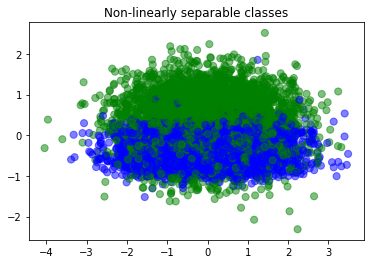

In [4]:
colors=['green','blue']
cmap = matplotlib.colors.ListedColormap(colors)
#Plot the figure
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y,
           marker= 'o', s=50,cmap=cmap,alpha = 0.5 )
plt.show()

- In order to feed the network the input has to be of **shape (number of features, number of samples)** and target should be of shape **(1, number of samples)**
- Transpose X and assign it to variable 'X_data'
- reshape y to have shape (1, number of samples) and assign to variable 'y_data'

In [5]:
X_data = X.T
y_data = y.reshape(1,len(y))

assert X_data.shape == (10, 10000)
assert y_data.shape == (1, 10000)

Define the network dimension to have **10** input features, **two** **hidden layers** with **9** nodes each, one output node at final layer. 

In [6]:
layer_dims = [10,9,9,1]

import tensorflow as tf

In [7]:
import tensorflow as tf            #import tensorflow

Define a function named placeholders to return two placeholders one for input data as A_0 and one for output data as Y.
- Set the datatype of placeholders as float64
- parameters - num_features
- Returns - A_0 with shape (num_feature, None) and Y with shape(1,None)

In [8]:
def placeholders(num_features):
    A_0 = tf.placeholder(dtype = tf.float64, shape = ([num_features,None]))
    Y = tf.placeholder(dtype = tf.float64, shape = ([1,None]))
    return A_0,Y

define function named initialize_parameters_deep() to initialize weights and bias for each layer
- Use tf.random_normal() to initialise weights and tf.zeros() to initialise bias. Set datatype as float64
- Parameters - layer_dims
- Returns - dictionary of weights and bias

In [23]:
def initialize_parameters_deep(layer_dims):
    tf.set_random_seed(1)
    L = len(layer_dims)
    parameters = {}
    for l in range(1,L):
        ###Start code here
        parameters['W' + str(l)] = tf.get_variable('W'+str(l),
                                                   dtype=tf.float64,shape=[layer_dims[l],layer_dims[l-1]],
                                                   initializer=tf.random_normal_initializer())
        parameters['b' + str(l)] = tf.get_variable('b'+str(l),dtype=tf.float64,shape=[layer_dims[l],1],
                                                   initializer=tf.zeros_initializer())
        #End code
    return parameters 

Define functon named linear_forward_prop() to define forward propagation for a given layer.
- parameters: A_prev(output from previous layer), W(weigth matrix of current layer), b(bias vector for current layer),activation(type of activation to be used for out of current layer)  
- returns: A(output from the current layer)
- Use relu activation for hidden layers and for final output layer return the output unactivated i.e if activation is sigmoid

In [24]:
def linear_forward_prop(A_prev,W,b, activation):
    Z = tf.add(tf.matmul(W, A_prev), b)
    if activation == "sigmoid":
        A = Z
    elif activation == "relu":
        A = tf.nn.relu(Z)
    return A

Define forward propagation for entire network as l_layer_forward()
- Parameters: A_0(input data), parameters(dictionary of weights and bias)
- returns: A(output from final layer)  

In [25]:
def l_layer_forwardProp(A_0, parameters):
    A = A_0
    L = len(parameters)//2
    for l in range(1,L):
        A_prev = A
    ###Start code
        A = linear_forward_prop(A_prev , parameters['W'+str(l)],parameters['b'+str(l)],'relu')  #call linear forward prop with relu activation
    A = linear_forward_prop(A_prev , parameters['W'+str(L)],parameters['b'+str(L)],'sigmoid')    #call linear forward prop with sigmoid activation
    ###End code
    return A

- Define the cost function
- parameters:
  - Z_final: output fro final layer
  - Y: actual output
  - parameters: dictionary of weigths and bias
  - regularization : boolean
  - lambd: regularization parameter
- First define the original cost using tensoflow's sigmoid_cross_entropy function
- If **regularization == True** add regularization term to original cost function

In [26]:
def final_cost(Z_final, Y , parameters, regularization = False, lambd = 0):
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final,labels=Y)
    if regularization:
        reg_term = 0
        L = len(parameters)//2
        for l in range(1,L+1):
            ###Start code
            reg_term += tf.nn.l2_loss(parameters['W'+str(l)])    #add L2 loss term
            ###End code
        cost = cost + (lambd/2) * reg_term
    return tf.reduce_mean(cost)

Define the function to generate mini-batches.

In [27]:
import numpy as np
def random_samples_minibatch(X, Y, batch_size, seed = 1):
    np.random.seed(seed)
    ###Start code
    m =  X.shape[1]                                          #number of samples
    num_batches = int(m/batch_size)                                #number of batches derived from batch_size
    ###End code
    indices =  np.random.permutation(m)                                 # generate ramdom indicies
    shuffle_X = X[:,indices]
    shuffle_Y = Y[:,indices]
    mini_batches = []
    
    #generate minibatch
    for i in range(num_batches):
        X_batch = shuffle_X[:,i * batch_size:(i + 1) * batch_size]
        Y_batch = shuffle_Y[:,i * batch_size:(i + 1) * batch_size]
        
        assert X_batch.shape == (X.shape[0], batch_size)
        assert Y_batch.shape == (Y.shape[0], batch_size)
        
        mini_batches.append((X_batch, Y_batch))
    
    #generate batch with remaining number of samples
    if m % batch_size != 0:
        X_batch = shuffle_X[:, (num_batches * batch_size):]
        Y_batch = shuffle_Y[:, (num_batches * batch_size):]
        mini_batches.append((X_batch, Y_batch))
    return mini_batches

In [33]:
def model(X_train,Y_train, layer_dims, learning_rate, optimizer ,num_iter, mini_batch_size):
    tf.reset_default_graph()
    num_features, num_samples = X_train.shape
    ###Start code
    A_0, Y =  placeholders(num_features)#call placeholder function to initialize placeholders A_0 and Y
    parameters = initialize_parameters_deep(layer_dims)   #Initialse Weights and bias using initialize_parameters
    Z_final =   l_layer_forwardProp(A_0,parameters)  #call the function l_layer_forwardProp() to define the final output
    
    cost = final_cost(Z_final,Y,parameters,regularization=True) #call the final_cost function with regularization set TRUE
    ###End code
#     print(cost)
    ###Start code
    if optimizer == "momentum":
        train_net = tf.train.MomentumOptimizer(learning_rate, momentum=0.9).minimize(cost) #call tensorflow's momentum optimizer with momentum = 0.9
    elif optimizer == "rmsProp":
        train_net = tf.train.RMSPropOptimizer(learning_rate,decay=0.999).minimize(cost)                  #call tensorflow's RMS optimiser with decay = 0.999
    elif optimizer == "adam":
        train_net =  tf.train.AdadeltaOptimizer(learning_rate, 0.9, 0.999).minimize(cost)                ##call tensorflow's adam optimizer with beta1 = 0.9, beta2 = 0.999
    ###End code
    seed = 1
    num_minibatches = int(num_samples / mini_batch_size)
    init = tf.global_variables_initializer()
    costs = []
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_iter):
            epoch_cost = 0
            ###Start code
            mini_batches = random_samples_minibatch(X_train, Y_train,mini_batch_size,seed)              #call random_sample_minibatch to return minibatches
            ###End code
            seed = seed + 1
            
            #perform gradient descent for each mini-batch
            for mini_batch in mini_batches:
                ###Start code
                X_batch, Y_batch = mini_batch            #assign minibatch
                ###End code
                _,mini_batch_cost = sess.run([train_net, cost], feed_dict={A_0: X_batch, Y: Y_batch})
                epoch_cost += mini_batch_cost/num_minibatches
            
            if epoch % 2 == 0:
                costs.append(epoch_cost)
            if epoch % 10 == 0:
                print(epoch_cost)
        with open("output_momentum.txt", "w+") as file:
            file.write("%f" % epoch_cost)
        plt.ylim(0 ,2, 0.0001)
        plt.xlabel("epoches per 2")
        plt.ylabel("cost")
        plt.plot(costs)
        plt.show()
        params = sess.run(parameters)
    return params

Call the method model_with_minibatch() with learning rate 0.001, **optimizer = momentum** num_iter = 100 and minibatch 256

3.5664186567253857
0.22677126234248343
0.21155790492719004
0.20388816726961836
0.20479965000988712
0.1990226641607747
0.1986634477505767
0.1997951066570784
0.19850713888578958
0.1960525490269073


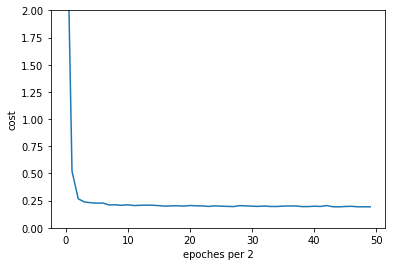

In [29]:
params_momentum = model(X_data,y_data,layer_dims,learning_rate=0.001,optimizer='momentum',num_iter=100,mini_batch_size=256)

Call the method model_with_minibatch() with learning rate 0.001, **optimizer = rmsProp** num_iter = 100 and minibatch 256

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
4.575842293304013
1.806213512210121
0.7025304673281325
0.37018716779449545
0.2853378361760266
0.24746583013150444
0.23212276166492207
0.2254339726397096
0.2177915971025634
0.21223304547213873


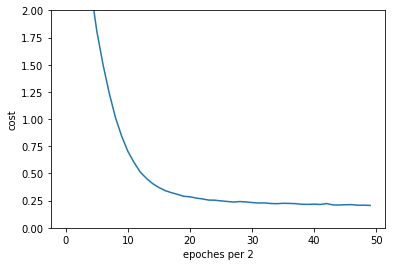

In [31]:
params_rms = model(X_data,y_data,layer_dims,learning_rate=0.001,optimizer='rmsProp',num_iter=100,mini_batch_size=256)

Call the method model_with_minibatch() with learning rate 0.001, **optimizer = adam** num_iter = 100 and minibatch 256

4.585588113628999
1.7701223045951429
0.6647093919983807
0.36664642839117356
0.29383784202527674
0.2589582727018619
0.24484732137940501
0.2376836025378547
0.2297490172838802
0.2247280031700232


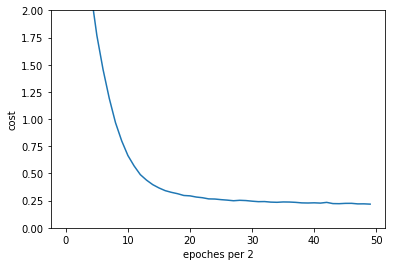

In [34]:
params_adam = model(X_data,y_data,layer_dims,learning_rate=0.001,optimizer='adam',num_iter=100,mini_batch_size=256)